In [5]:
import geopandas as gpd
from simpledbf import Dbf5
import time
from glob import glob
import pandas as pd
import sys
from datetime import datetime, time, timedelta
from math import pi, cos, sin


In [6]:
def solar_time(date_str, longit):
#     if len(sys.argv) != 4:
#         print('Usage: hour_angle.py [YYYY/MM/DD] [HH:MM:SS] [longitude]')
#         sys.exit()
#     else:
    #dt = datetime.strptime(sys.argv[1] + ' ' + sys.argv[2], '%Y/%m/%d %H:%M:%S')
    dt = datetime.strptime(date_str, '%Y/%m/%d %H:%M:%S')
    #longit = float(sys.argv[3])

    gamma = 2 * pi / 365 * (dt.timetuple().tm_yday - 1 + float(dt.hour - 12) / 24)
    eqtime = 229.18 * (0.000075 + 0.001868 * cos(gamma) - 0.032077 * sin(gamma) \
             - 0.014615 * cos(2 * gamma) - 0.040849 * sin(2 * gamma))
    decl = 0.006918 - 0.399912 * cos(gamma) + 0.070257 * sin(gamma) \
           - 0.006758 * cos(2 * gamma) + 0.000907 * sin(2 * gamma) \
           - 0.002697 * cos(3 * gamma) + 0.00148 * sin(3 * gamma)
    time_offset = eqtime + 4 * longit
    tst = dt.hour * 60 + dt.minute + dt.second / 60 + time_offset
    solar_time = datetime.combine(dt.date(), time(0)) + timedelta(minutes=tst)
    print(solar_time)
    
def solar_time_df(df):
#     if len(sys.argv) != 4:
#         print('Usage: hour_angle.py [YYYY/MM/DD] [HH:MM:SS] [longitude]')
#         sys.exit()
#     else:
    #dt = datetime.strptime(sys.argv[1] + ' ' + sys.argv[2], '%Y/%m/%d %H:%M:%S')
    #dt = datetime.strptime(date_str, '%Y/%m/%d %H:%M:%S')
    longit = df['LONGITUDE']
    date_reformat = '{}/{}/{}'.format(df['ACQ_DATE'].year, df['ACQ_DATE'].month, df['ACQ_DATE'].day) 
    time_reformat = '{}:{}:{}'.format(df['ACQ_TIME'][:2],df['ACQ_TIME'][2:],'00')
    dt = datetime.strptime(date_reformat + ' ' + time_reformat, '%Y/%m/%d %H:%M:%S')
    
    gamma = 2 * pi / 365 * (dt.timetuple().tm_yday - 1 + float(dt.hour - 12) / 24)
    eqtime = 229.18 * (0.000075 + 0.001868 * cos(gamma) - 0.032077 * sin(gamma) \
             - 0.014615 * cos(2 * gamma) - 0.040849 * sin(2 * gamma))
    decl = 0.006918 - 0.399912 * cos(gamma) + 0.070257 * sin(gamma) \
           - 0.006758 * cos(2 * gamma) + 0.000907 * sin(2 * gamma) \
           - 0.002697 * cos(3 * gamma) + 0.00148 * sin(3 * gamma)
    time_offset = eqtime + 4 * longit
    tst = dt.hour * 60 + dt.minute + dt.second / 60 + time_offset
    solar_time = datetime.combine(dt.date(), time(0)) + timedelta(minutes=tst)
    print(solar_time)
    
def solar_time_df_map(acq_date, acq_time, long):
#     if len(sys.argv) != 4:
#         print('Usage: hour_angle.py [YYYY/MM/DD] [HH:MM:SS] [longitude]')
#         sys.exit()
#     else:
    #dt = datetime.strptime(sys.argv[1] + ' ' + sys.argv[2], '%Y/%m/%d %H:%M:%S')
    #dt = datetime.strptime(date_str, '%Y/%m/%d %H:%M:%S')
    longit = long
    date_reformat = '{}/{}/{}'.format(acq_date.year, acq_date.month, acq_date.day) 
    time_reformat = '{}:{}:{}'.format(acq_time[:2],acq_time[2:],'00')
    dt = datetime.strptime(date_reformat + ' ' + time_reformat, '%Y/%m/%d %H:%M:%S')
    
    gamma = 2 * pi / 365 * (dt.timetuple().tm_yday - 1 + float(dt.hour - 12) / 24)
    eqtime = 229.18 * (0.000075 + 0.001868 * cos(gamma) - 0.032077 * sin(gamma) \
             - 0.014615 * cos(2 * gamma) - 0.040849 * sin(2 * gamma))
    decl = 0.006918 - 0.399912 * cos(gamma) + 0.070257 * sin(gamma) \
           - 0.006758 * cos(2 * gamma) + 0.000907 * sin(2 * gamma) \
           - 0.002697 * cos(3 * gamma) + 0.00148 * sin(3 * gamma)
    time_offset = eqtime + 4 * longit
    tst = dt.hour * 60 + dt.minute + dt.second / 60 + time_offset
    solar_time = datetime.combine(dt.date(), time(0)) + timedelta(minutes=tst)
    
    return(solar_time)

In [7]:
fi = r"D:\projects\RD\night_fire\modis_fire_points\DL_FIRE_M6_50643\fire_archive_M6_50643.dbf"
fi = r"D:/projects/RD/night_fire/modis_fire_points/DL_FIRE_M6_50646/fire_archive_M6_50646.dbf"
dbf = Dbf5(fi)
df_dbf = dbf.to_dataframe()

In [8]:
df_dbf.columns

Index(['LATITUDE', 'LONGITUDE', 'BRIGHTNESS', 'SCAN', 'TRACK', 'ACQ_DATE',
       'ACQ_TIME', 'SATELLITE', 'INSTRUMENT', 'CONFIDENCE', 'VERSION',
       'BRIGHT_T31', 'FRP', 'DAYNIGHT', 'TYPE'],
      dtype='object')

In [9]:
time_df = df_dbf[['LONGITUDE', 'ACQ_DATE', 'ACQ_TIME']]

In [10]:
sample = time_df.iloc[15000]
sample

LONGITUDE       20.7196
ACQ_DATE     2007-01-02
ACQ_TIME           0918
Name: 15000, dtype: object

In [11]:
date_reformat = '{}/{}/{}'.format(sample['ACQ_DATE'].year, sample['ACQ_DATE'].month, sample['ACQ_DATE'].day) 
time_reformat = '{}:{}:{}'.format(sample['ACQ_TIME'][:2],sample['ACQ_TIME'][2:],'00')
date_reformat, time_reformat

('2007/1/2', '09:18:00')

In [12]:
datetime.strptime(date_reformat + ' ' + time_reformat, '%Y/%m/%d %H:%M:%S')

datetime.datetime(2007, 1, 2, 9, 18)

In [13]:
solar_time(date_reformat + ' ' + time_reformat, sample['LONGITUDE'])

2007-01-02 10:37:34.979811


In [14]:
solar_time_df(sample)

2007-01-02 10:37:34.979811


## works for a sample, map it to a field

In [15]:
# time_df['solar_time'] = list(map(solar_time_df(time_df.iterrows())))
#time_df['solar_time'] = time_df.applymap(solar_time_df)
time_df['solar_time'] = list(map(solar_time_df_map, time_df['ACQ_DATE'], time_df['ACQ_TIME'], time_df['LONGITUDE']))

C:\software\anaconda3\envs\eapy_gbdx\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
time_df['DAYNIGHT'] = df_dbf['DAYNIGHT']

C:\software\anaconda3\envs\eapy_gbdx\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
groups = list(time_df.groupby('DAYNIGHT'))
day_group = groups[0][1]
night_group = groups[1][1]

In [18]:
def get_hour(dt):
    return(dt.hour)
day_group['solar_hour'] = list(map(get_hour, day_group['solar_time']))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD13798630>]],
      dtype=object)

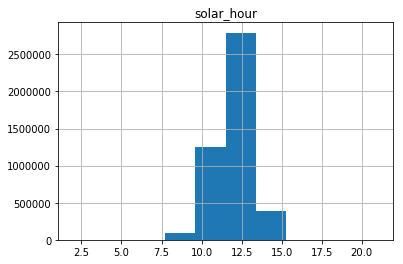

In [19]:
day_group.hist('solar_hour')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD235FCA90>]],
      dtype=object)

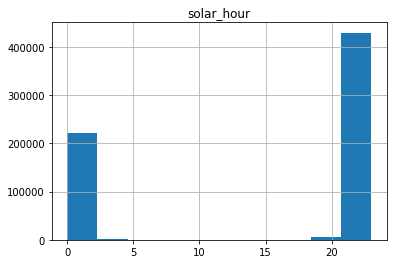

In [20]:
night_group['solar_hour'] = list(map(get_hour, night_group['solar_time']))
night_group.hist('solar_hour')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BD47A23A90>],
      dtype=object)

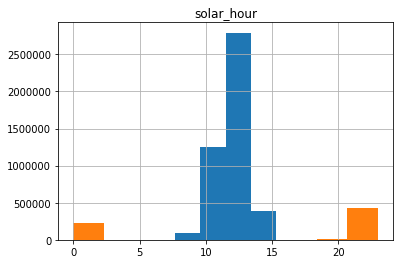

In [21]:
ax = day_group.hist('solar_hour')
night_group.hist('solar_hour', ax=ax)

In [22]:
sample['ACQ_TIME']

'0918'

## delete below

In [23]:
from gbdxtools import CatalogImage, Interface

In [24]:
did = '10400100530FCA00'

In [25]:
aoi = gpd.read_file(r"C:\Users\jomc9287\Downloads\map.geojson")
aoi.bounds.values[0]

array([-105.23771524,   39.97559088, -105.22881031,   39.98343393])

In [26]:
img = CatalogImage(did, bbox=aoi.bounds.values[0], pansharpen=True)

In [27]:
gbdx = Interface()

In [28]:
gbdx.ordering.order(did)

'd2496538-26bf-4070-976c-e5ab5cd00ef3'

In [29]:
CatalogImage.is_ordered(did)

True

In [30]:
gbdx.ordering.status('48f082d4-c712-466c-ab46-7eaa85dda475')

[{'acquisition_id': '10400100530FCA00',
  'state': 'delivered',
  'location': 's3://receiving-dgcs-tdgplatform-com/011829559010_01_003'}]

In [31]:
img.shape

(8, 2094, 2377)

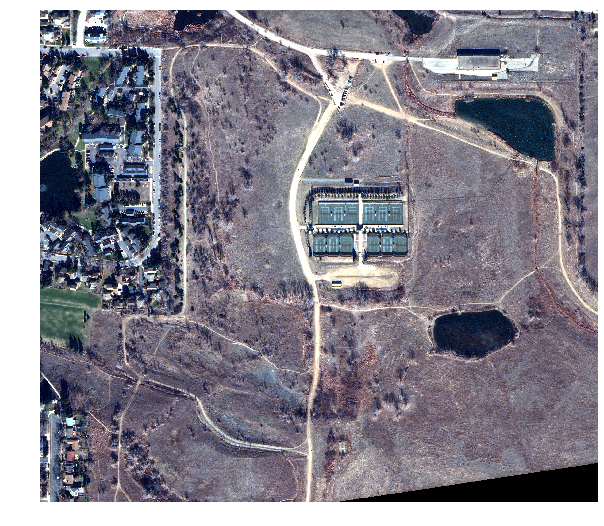

In [32]:
img.plot()

In [34]:
img.geotiff(path=r'D:\cu_south_december_2019_{}.tif'.format(did))

'D:\\cu_south_december_2019_10400100530FCA00.tif'

In [35]:
img = CatalogImage(did, bbox=aoi.bounds.values[0], pansharpen=True, acomp=True)
img.geotiff(path=r'D:\cu_south_december_2019_{}_acomp.tif'.format(did))

'D:\\cu_south_december_2019_10400100530FCA00_acomp.tif'